# Interactive Data Visualization with Plotly

[Plotly for Python](https://plotly.com/python/getting-started/) is a `Python` library allows us to plot beautiful interactive web-based visualizations that can be displayed in Jupyter notebooks, saved to standalone HTML files, or served as part of pure Python-built web applications using [Dash](https://dash.plotly.com/introduction). [Cufflinks](https://github.com/santosjorge/cufflinks) binds the power of `Plotly` with the flexibility of `Pandas` for easy plotting.

#### Installation

```
conda install plotly
pip install cufflinks
```

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

from plotly import __version__
__version__

'5.1.0'

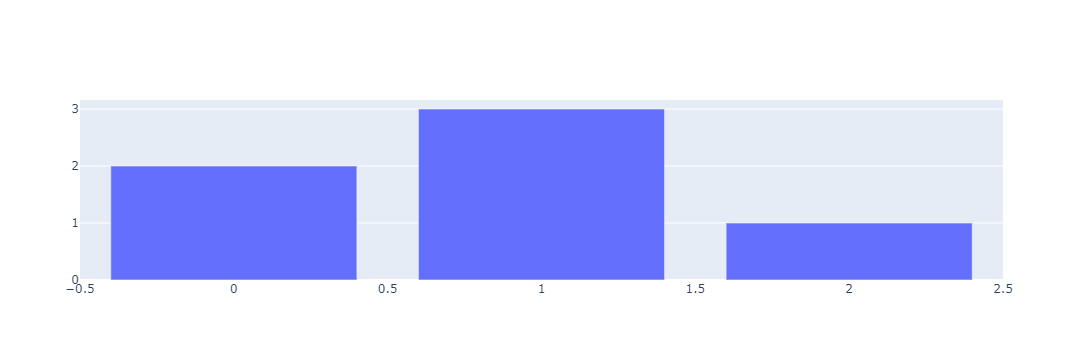

In [2]:
# Plot a bar chart using Figure
fig1 = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig1.show()

In [3]:
# Save chart to an HTLM file
fig1.write_html('html-charts/plotly_figure.html', auto_open=True)

In [4]:
# Plot a bar chart using FigureWidget
fig2 = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
fig2

FigureWidget({
    'data': [{'type': 'bar', 'uid': '241a9c19-d983-4b34-b3ae-87a2209b5131', 'y': [2, 3, 1]}],
 …

## Binding Plotly and Pandas using Cufflinks

In [5]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [6]:
# Connect Plotly's JavaScript to Jupyter Notebook so that Plotly still work in offline situation
init_notebook_mode(connected=True)

In [7]:
# Allow Cufflinks to loat the plotly.js library locally from the plotly python package
cf.go_offline()

In [8]:
# Prepare data
df = pd.DataFrame(np.random.randn(100, 4), columns='A B C D'.split())
df.head()

A         B         C         D
0 -2.102569  1.859107  0.194821  0.371656
1 -1.215599  1.671112  0.739561 -0.814454
2  0.636827 -1.198943 -1.356879 -1.752163
3  1.253606 -0.748712 -1.428883  1.280078
4 -0.133351 -1.209629  0.145972  1.022045

In [9]:
df2 = pd.DataFrame({
    'Category': ['A', 'B', 'C'], 
    'Values': [34, 44, 61]
})
df2

Category  Values
0        A      34
1        B      44
2        C      61

<AxesSubplot:>

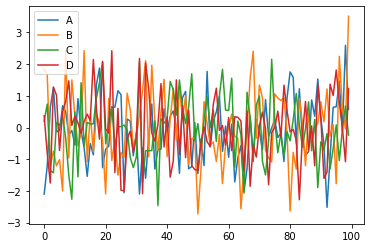

In [10]:
# Show a plot of df using Matplotlib (the normal way we usually do)
%matplotlib inline
df.plot()

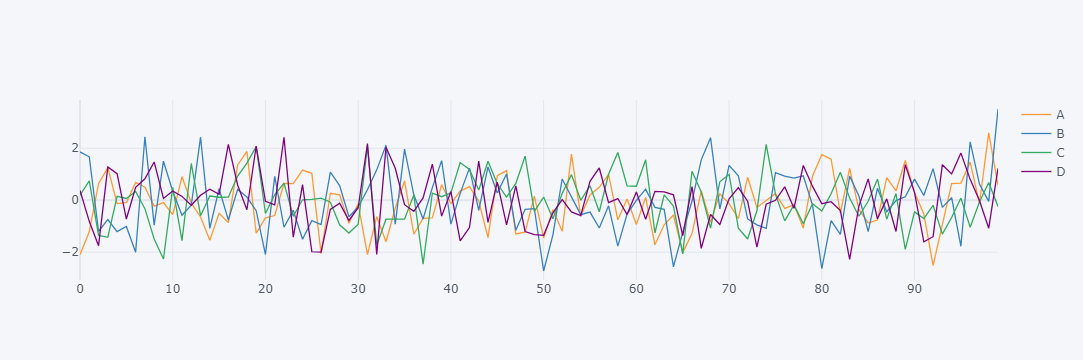

In [11]:
# Use Plotly to plot a chart of data of df
# Notation: df.iplot()
df.iplot()

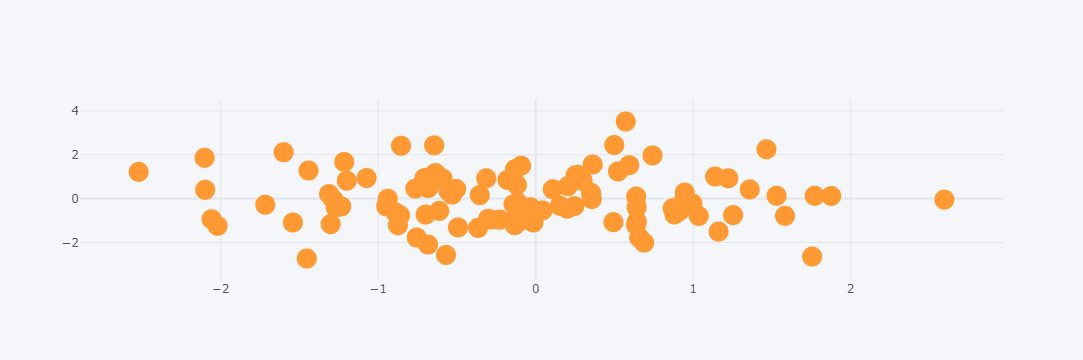

In [12]:
# Scatter plot of 'A' column vs 'B' column
# mode='marker' to create dots
# size='...' to specify size of the marker dots
df.iplot(kind='scatter', x='A', y='B', mode='markers', size=20)

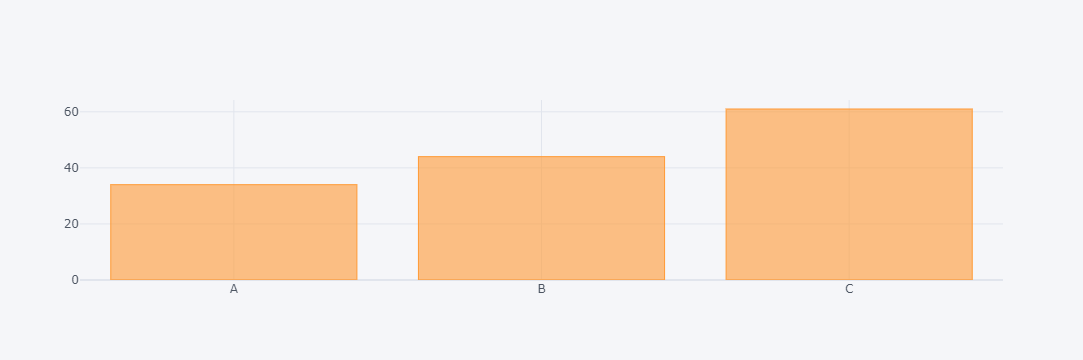

In [13]:
# Bar plot
df2.iplot(kind='bar', x='Category', y='Values')

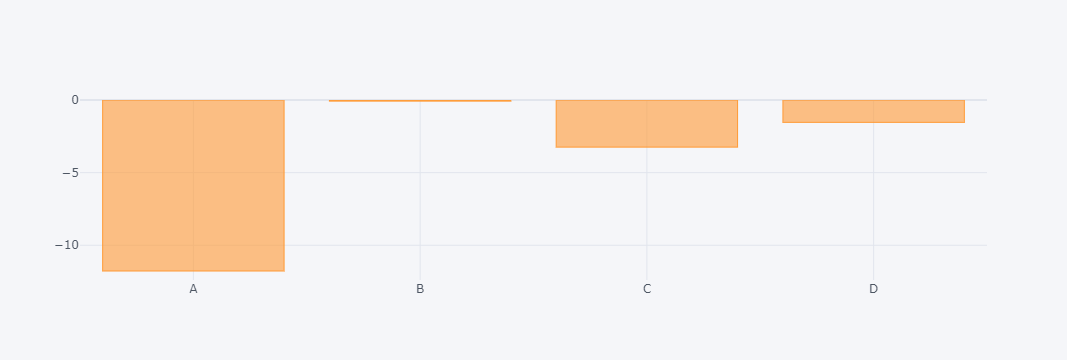

In [14]:
# Aggregate df (calculate sum for each column)
# then plot a bar chart
df.sum().iplot(kind='bar')

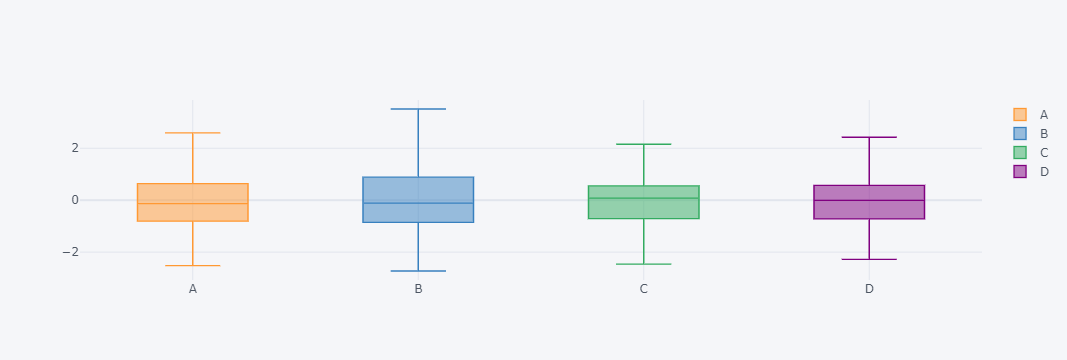

In [15]:
# Box plot
df.iplot(kind='box')

In [16]:
# 3-D surface plot
df3 = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 20, 30, 20, 10],
    'z': [500, 400, 300, 200, 100]
})
df3

x   y    z
0  1  10  500
1  2  20  400
2  3  30  300
3  4  20  200
4  5  10  100

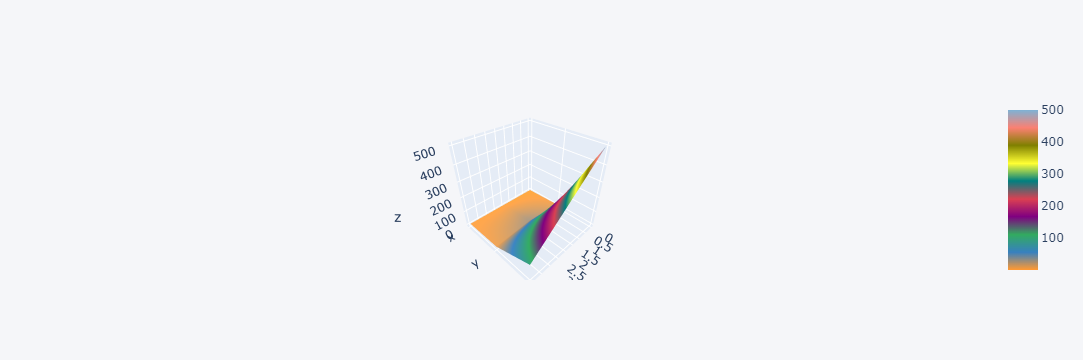

In [17]:
df3.iplot(kind='surface')

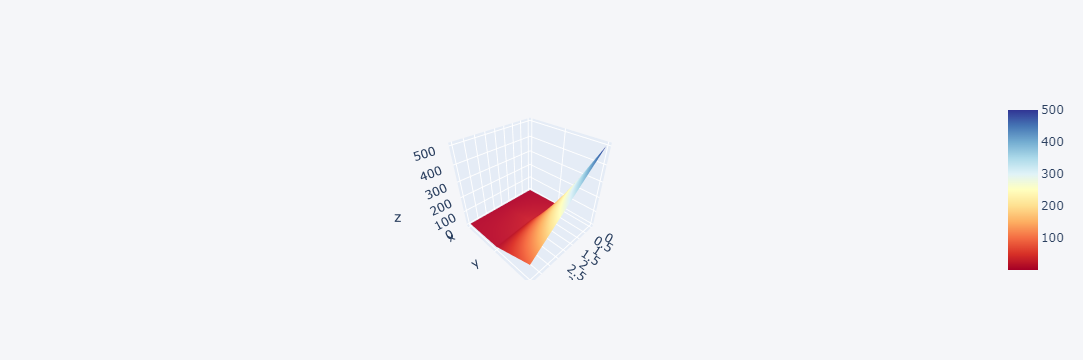

In [18]:
# We can change color scale
# colorscale='rdylbu'
# rd = red, yl = yellow, bu = blue
df3.iplot(kind='surface', colorscale='rdylbu')

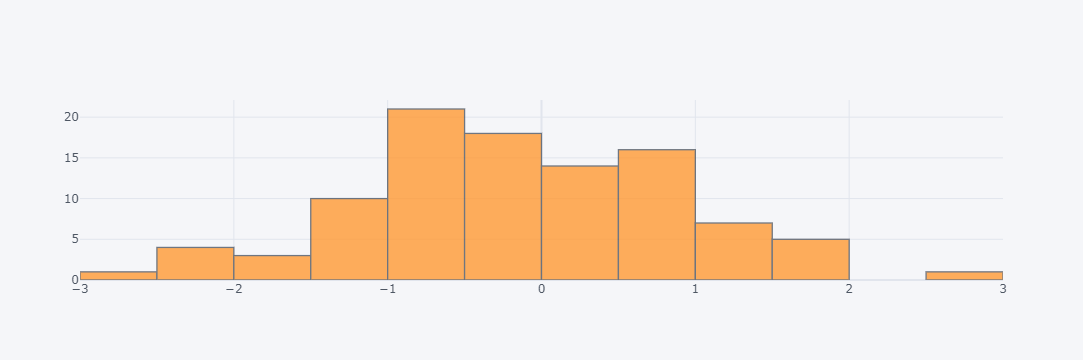

In [19]:
# Histogram plot
# Create a histograp plot for a specific column ('A' in this example)
df['A'].iplot(kind='hist', bins=25)

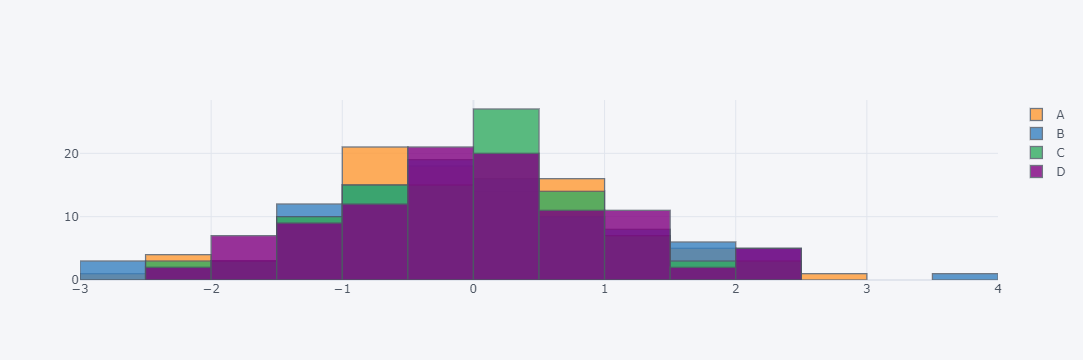

In [20]:
# Histogram for all columns of a dataframe
# click on each column legend to see histogram for each column
df.iplot(kind='hist')

C:\Users\hoang.tran\Desktop\Home\Workplace\AIMachineLearningDataScience\00-basics\env\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\hoang.tran\Desktop\Home\Workplace\AIMachineLearningDataScience\00-basics\env\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



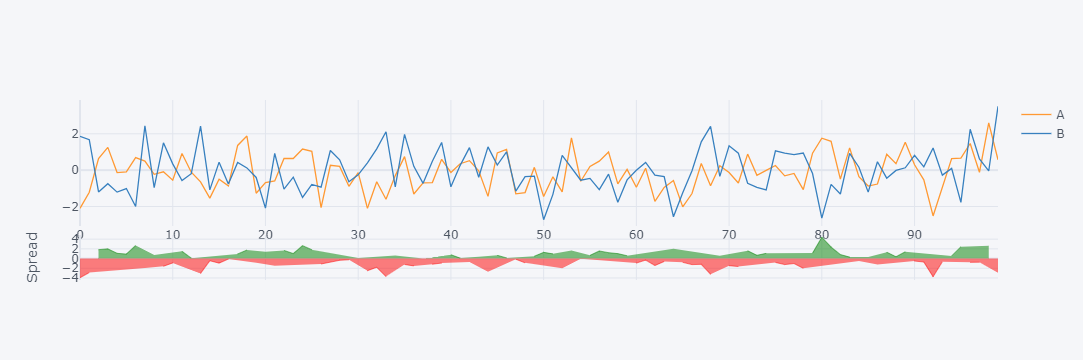

In [21]:
# Spread type visualization
df[['A', 'B']].iplot(kind='spread')

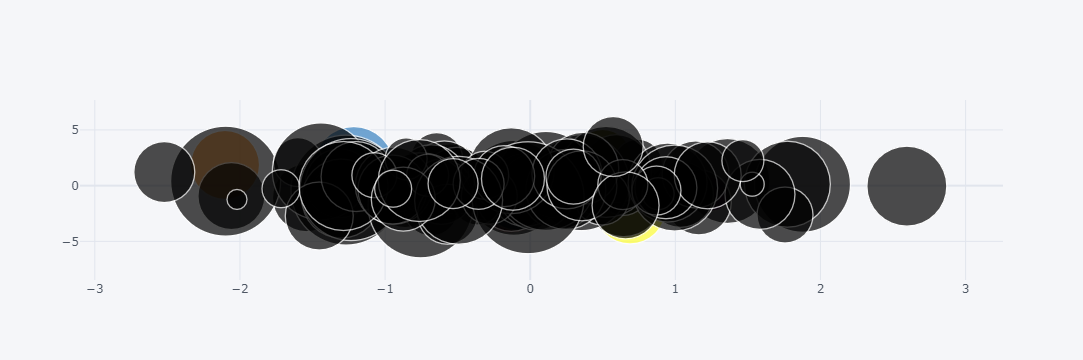

In [22]:
# Bubble plot (similar to scatter plot, but has different sized bubbles)
# x-axis = column A
# y-axis = column B
# buble size = column C (values)
df.iplot(kind='bubble', x='A', y='B', size='C')

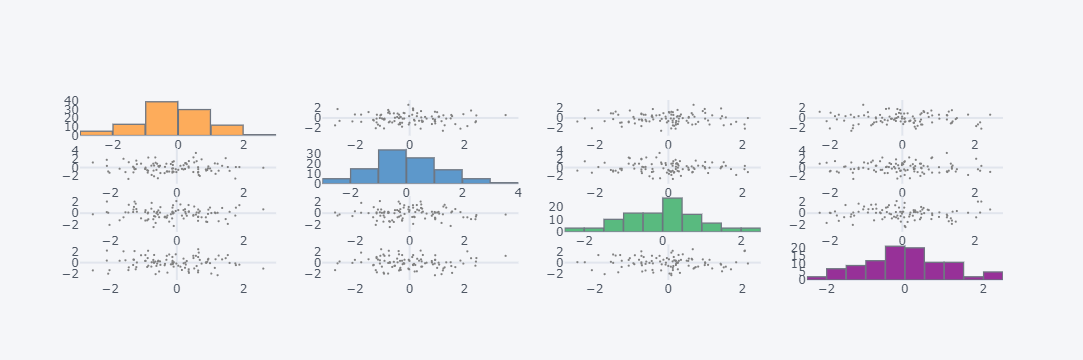

In [23]:
# Scatter metrics plot (similar to Seaborn pair plot)
df.scatter_matrix()